In [1]:
import numpy
import xarray
import netCDF4
import cmocean
import cartopy

import matplotlib.colors
import matplotlib.pyplot as mp

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


# define the cases for analysis

**case options**

* **F2000climo.cam0367.clm0367** - case 1a
* **F2000climo.cam0367.clm1468** - case 1b


* **FEQUINOX.cam0367.clm0367** - case 2a
* **FEQUINOX.cam0367.clm1468** - case 2b


* **FEQUINOXNOCROP.cam0367.clm0367** - case 3a
* **FEQUINOXNOCROP.cam0367.clm1468** - case 3b

In [4]:
case1a = 'F2000climo.cam0367.clm0367'
case1b = 'F2000climo.cam0367.clm1468'

case2a = 'FEQUINOX.cam0367.clm0367'
case2b = 'FEQUINOX.cam0367.clm1468'

case3a = 'FEQUINOXNOCROP.cam0367.clm0367'
case3b = 'FEQUINOXNOCROP.cam0367.clm1468'

* set root directory for location

In [3]:
root_dir='/beegfs/DATA/pritchard/blangenb/CESM2_ARCHIVE/'

# open CAM (atm) data sets

In [5]:
ds1a_atm = xarray.open_mfdataset(root_dir + case1a + '/atm/hist/*01-01-01*.nc', decode_times=False)
ds1b_atm =  xarray.open_mfdataset(root_dir + case1b + '/atm/hist/*01-01-01*.nc', decode_times=False)

ds2a_atm = xarray.open_mfdataset(root_dir + case2a + '/atm/hist/*01-01-01*.nc', decode_times=False)
ds2b_atm =  xarray.open_mfdataset(root_dir + case2b + '/atm/hist/*01-01-01*.nc', decode_times=False)

ds3a_atm = xarray.open_mfdataset(root_dir + case3a + '/atm/hist/*01-01-01*.nc', decode_times=False)
ds3b_atm =  xarray.open_mfdataset(root_dir + case3b + '/atm/hist/*01-01-01*.nc', decode_times=False)

# open CLM (lnd) data sets

In [6]:
ds1a_lnd = xarray.open_mfdataset(root_dir + case1a + '/lnd/hist/*01-01-01*.nc', decode_times=False)
ds1b_lnd =  xarray.open_mfdataset(root_dir + case1b + '/lnd/hist/*01-01-01*.nc', decode_times=False)

ds2a_lnd = xarray.open_mfdataset(root_dir + case2a + '/lnd/hist/*01-01-01*.nc', decode_times=False)
ds2b_lnd =  xarray.open_mfdataset(root_dir + case2b + '/lnd/hist/*01-01-01*.nc', decode_times=False)

ds3a_lnd = xarray.open_mfdataset(root_dir + case3a + '/lnd/hist/*01-01-01*.nc', decode_times=False)
ds3b_lnd =  xarray.open_mfdataset(root_dir + case3b + '/lnd/hist/*01-01-01*.nc', decode_times=False)

# get time, lat, lon, landfrac

In [7]:
time1 = ds1a_atm['time']
time1_converted = netCDF4.num2date(time1.values, time1.units, time1.calendar)

lat = ds1a_atm['lat'].values
lon = ds1a_atm['lon'].values

landfrac = ds1a_lnd['landfrac'].values

# make lat lon pcolormesh (extend by 1 row and column, and center)

In [119]:
lon_pcolormesh = numpy.zeros(lon.size+2)
lon_pcolormesh[1:-1] = lon
lon_pcolormesh[0] = lon[0]-numpy.diff(lon)[0]
lon_pcolormesh[-1] = lon[-1]+numpy.diff(lon)[-1]

lon_pcolormesh_midpoints = lon_pcolormesh[:-1]+0.5*(numpy.diff(lon_pcolormesh))

lat_pcolormesh = numpy.zeros(lat.size+2)
lat_pcolormesh[1:-1] = lat
lat_pcolormesh[0] = lat[0]-numpy.diff(lat)[0]
lat_pcolormesh[-1] = lat[-1]+numpy.diff(lat)[-1]

lat_pcolormesh_midpoints = lat_pcolormesh[:-1]+0.5*(numpy.diff(lat_pcolormesh))

# get VEGT

In [9]:
qvegt_1a = ds1a_lnd['QVEGT']
qvegt_1b = ds1b_lnd['QVEGT']
qvegt1_diff = qvegt_1b-qvegt_1a
qvegt1_diff_timemean = qvegt1_diff.mean(dim='time').values

qvegt_2a = ds2a_lnd['QVEGT']
qvegt_2b = ds2b_lnd['QVEGT']
qvegt2_diff = qvegt_2b-qvegt_2a
qvegt2_diff_timemean = qvegt2_diff.mean(dim='time').values

qvegt_3a = ds3a_lnd['QVEGT']
qvegt_3b = ds3b_lnd['QVEGT']
qvegt3_diff = qvegt_3b-qvegt_3a
qvegt3_diff_timemean = qvegt3_diff.mean(dim='time').values

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


# get PRECT

In [12]:
precc_1a = ds1a_atm['PRECC']
precl_1a = ds1a_atm['PRECL']
precc_1b = ds1b_atm['PRECC']
precl_1b = ds1b_atm['PRECL']
prect_1a = precc_1a+precl_1a
prect_1b = precc_1b+precl_1b
prect1_diff = prect_1b-prect_1a
prect1_diff_timemean = prect1_diff.mean(dim='time').values

precc_2a = ds2a_atm['PRECC']
precl_2a = ds2a_atm['PRECL']
precc_2b = ds2b_atm['PRECC']
precl_2b = ds2b_atm['PRECL']
prect_2a = precc_2a+precl_2a
prect_2b = precc_2b+precl_2b
prect2_diff = prect_2b-prect_2a
prect2_diff_timemean = prect2_diff.mean(dim='time').values

precc_3a = ds3a_atm['PRECC']
precl_3a = ds3a_atm['PRECL']
precc_3b = ds3b_atm['PRECC']
precl_3b = ds3b_atm['PRECL']
prect_3a = precc_3a+precl_3a
prect_3b = precc_3b+precl_3b
prect3_diff = prect_3b-prect_3a
prect3_diff_timemean = prect3_diff.mean(dim='time').values

* calculate precip climatologies

In [15]:
prect1a_timemean = prect_1a.mean(dim='time').values
prect2a_timemean = prect_2a.mean(dim='time').values
prect3a_timemean = prect_3a.mean(dim='time').values

# get PCT_LANDUNIT

In [16]:
pct_landunit_1a = ds1a_lnd['PCT_LANDUNIT']
pct_landunit_1b = ds1b_lnd['PCT_LANDUNIT']
pct_landunit1_diff = pct_landunit_1b-pct_landunit_1a
pct_landunit1_diff_timemean = pct_landunit1_diff.mean(dim='time').values

pct_landunit_2a = ds2a_lnd['PCT_LANDUNIT']
pct_landunit_2b = ds2b_lnd['PCT_LANDUNIT']
pct_landunit2_diff = pct_landunit_2b-pct_landunit_2a
pct_landunit2_diff_timemean = pct_landunit2_diff.mean(dim='time').values

pct_landunit_3a = ds3a_lnd['PCT_LANDUNIT']
pct_landunit_3b = ds3b_lnd['PCT_LANDUNIT']
pct_landunit3_diff = pct_landunit_3b-pct_landunit_3a
pct_landunit3_diff_timemean = pct_landunit3_diff.mean(dim='time').values

pct_landunit_1a_timemean = pct_landunit_1a.mean(dim='time').values
pct_landunit_2a_timemean = pct_landunit_2a.mean(dim='time').values
pct_landunit_3a_timemean = pct_landunit_3a.mean(dim='time').values

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


# get TLAI

In [29]:
tlai_1a = ds1a_lnd['TLAI']
tlai_1b = ds1b_lnd['TLAI']
tlai1_diff = tlai_1b-tlai_1a
tlai1_diff_timemean = tlai1_diff.mean(dim='time').values

tlai_2a = ds2a_lnd['TLAI']
tlai_2b = ds2b_lnd['TLAI']
tlai2_diff = tlai_2b-tlai_2a
tlai2_diff_timemean = tlai2_diff.mean(dim='time').values

tlai_3a = ds3a_lnd['TLAI']
tlai_3b = ds3b_lnd['TLAI']
tlai3_diff = tlai_3b-tlai_3a
tlai3_diff_timemean = tlai3_diff.mean(dim='time').values

tlai_1a_timemean = tlai_1a.mean(dim='time').values
tlai_2a_timemean = tlai_2a.mean(dim='time').values
tlai_3a_timemean = tlai_3a.mean(dim='time').values

tlai_1b_timemean = tlai_1b.mean(dim='time').values
tlai_2b_timemean = tlai_2b.mean(dim='time').values
tlai_3b_timemean = tlai_3b.mean(dim='time').values

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


# get PCT_CFT

In [134]:
pct_cft_1a = ds1a_lnd['PCT_CFT']
pct_cft_1b = ds1b_lnd['PCT_CFT']
pct_cft1_diff = pct_cft_1b-pct_cft_1a
pct_cft1_diff_timemean = pct_cft1_diff.mean(dim='time').values

pct_cft_2a = ds2a_lnd['PCT_CFT']
pct_cft_2b = ds2b_lnd['PCT_CFT']
pct_cft2_diff = pct_cft_2b-pct_cft_2a
pct_cft2_diff_timemean = pct_cft2_diff.mean(dim='time').values

pct_cft_3a = ds3a_lnd['PCT_CFT']
pct_cft_3b = ds3b_lnd['PCT_CFT']
pct_cft3_diff = pct_cft_3b-pct_cft_3a
pct_cft3_diff_timemean = pct_cft3_diff.mean(dim='time').values

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


# get TS

In [87]:
ts_1a = ds1a_atm['TS']
ts_1b = ds1b_atm['TS']
ts1_diff = ts_1b-ts_1a
ts1_diff_timemean = ts1_diff.mean(dim='time').values

ts_2a = ds2a_atm['TS']
ts_2b = ds2b_atm['TS']
ts2_diff = ts_2b-ts_2a
ts2_diff_timemean = ts2_diff.mean(dim='time').values

ts_3a = ds3a_atm['TS']
ts_3b = ds3b_atm['TS']
ts3_diff = ts_3b-ts_3a
ts3_diff_timemean = ts3_diff.mean(dim='time').values

# plot prect diffs

In [113]:
colors1 = cmocean.cm.turbid_r(np.linspace(0., 1, 128))
colors2 = cmocean.cm.deep(np.linspace(0, 1, 128))
#colors1 = cmocean.cm.algae_4(np.linspace(0., 1, 128))

# combine them and build a new colormap
colors = numpy.vstack((colors1, colors2))
cmap_precip = matplotlib.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

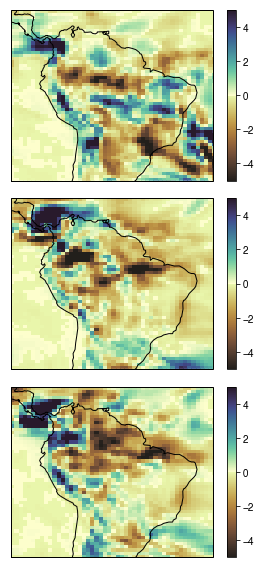

In [112]:
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,8))

ax = fig.add_subplot(311, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour1 = ax.pcolormesh(lon,lat,prect1_diff_timemean*86400.*1000.,\
                        vmin=-5,vmax=5,cmap=cmap_precip)
mp.colorbar(contour1)


ax = fig.add_subplot(312, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour2 = ax.pcolormesh(lon,lat,prect2_diff_timemean*86400.*1000.,\
                        vmin=-5,vmax=5,cmap=cmap_precip)
mp.colorbar(contour2)



ax = fig.add_subplot(313, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour3 = ax.pcolormesh(lon,lat,prect3_diff_timemean*86400.*1000.,\
                        vmin=-5,vmax=5,cmap=cmap_precip)
mp.colorbar(contour3)

fig.tight_layout()

# plot ts

In [93]:
my_cmap = cmocean.cm.balance

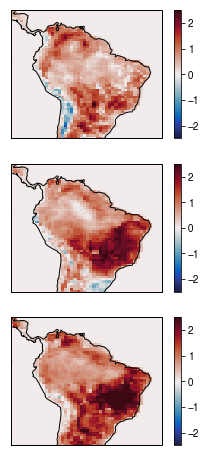

In [97]:
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,8))

ax = fig.add_subplot(311, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour1 = ax.pcolormesh(lon,lat,ts1_diff_timemean,\
                        vmin=-2.5,vmax=2.5,cmap=my_cmap)
mp.colorbar(contour1)


ax = fig.add_subplot(312, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour2 = ax.pcolormesh(lon,lat,ts2_diff_timemean,\
                        vmin=-2.5,vmax=2.5,cmap=my_cmap)
mp.colorbar(contour2)



ax = fig.add_subplot(313, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour3 = ax.pcolormesh(lon,lat,ts3_diff_timemean,\
                        vmin=-2.5,vmax=2.5,cmap=my_cmap)
mp.colorbar(contour3)



# plot qvegt

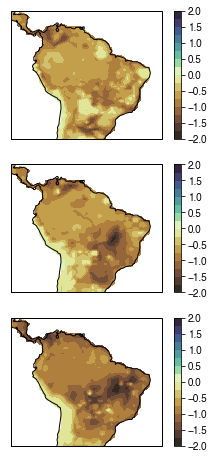

In [131]:
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,8))

levels = numpy.arange(-2,2.1,0.25)
ax = fig.add_subplot(311, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour1 = ax.contourf(lon,lat,qvegt1_diff_timemean*86400.,\
                       levels=levels,
                       cmap=cmap_precip)
mp.colorbar(contour1)


ax = fig.add_subplot(312, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour2 = ax.contourf(lon,lat,qvegt2_diff_timemean*86400.,\
                       levels=levels,
                       cmap=cmap_precip)
mp.colorbar(contour2)



ax = fig.add_subplot(313, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour3 = ax.contourf(lon,lat,qvegt3_diff_timemean*86400.,\
                       levels=levels,
                       cmap=cmap_precip)
mp.colorbar(contour3)



# precip climatology

In [ ]:
map_proj = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(4.25,8))

levels = numpy.arange(0,10.1,1)
ax = fig.add_subplot(311, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour1 = ax.contourf(lon,lat,prect1a_timemean*86400.*1000.,\
                       levels=levels,
                       cmap=cmocean.cm.deep, extend='max')
contourline1 = ax.contour(lon,lat,prect1a_timemean*86400.*1000.,\
                       levels=[4],linewidths=[1],colors='firebrick')
mp.colorbar(contour1)


ax = fig.add_subplot(312, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour2 = ax.contourf(lon,lat,prect2a_timemean*86400.*1000.,\
                       levels=levels,
                       cmap=cmocean.cm.deep, extend='max')
contourline2 = ax.contour(lon,lat,prect2a_timemean*86400.*1000.,\
                       levels=[4],linewidths=[1],colors='firebrick')
mp.colorbar(contour2)



ax = fig.add_subplot(313, projection=map_proj)
ax.set_extent([270,330,-30,15])
ax.coastlines()
contour3 = ax.contourf(lon,lat,prect3a_timemean*86400.*1000.,\
                       levels=levels,
                       cmap=cmocean.cm.deep, extend='max')
contourline3 = ax.contour(lon,lat,prect3a_timemean*86400.*1000.,\
                       levels=[4],linewidths=[1],colors='firebrick')
mp.colorbar(contour3)

fig.tight_layout()

# what do crops do?

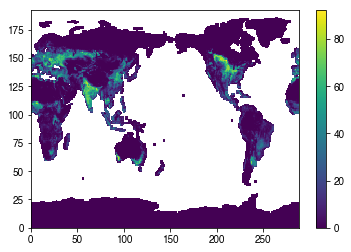

In [64]:
mp.pcolormesh(pct_landunit_1a[0,1,:,:]);mp.colorbar()

tropical differences in LAI in FEQUINOX runs

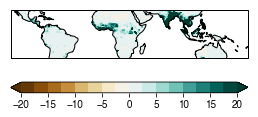

In [113]:
lat_lo=-30
lat_hi=30
lon_lo=-120
lon_hi=180

fontsize=12
map_proj = cartopy.crs.PlateCarree(central_longitude=0.)
fig = mp.figure(figsize=(4.25,3))
ax = fig.add_subplot(111, projection=map_proj)

levels = numpy.arange(-20,20.1,2.5)
contour_plot = ax.contourf(lon,lat,\
                           (tlai_2b_timemean-tlai_2a_timemean)*100.,\
                           levels=levels,\
                           cmap='BrBG',\
                           extend='both')
ax.coastlines(resolution='110m')
ax.set_extent([lon_lo,lon_hi,lat_lo,lat_hi], crs=map_proj)

cbar = mp.colorbar(contour_plot, orientation='horizontal')

percent of grid cells as crop land

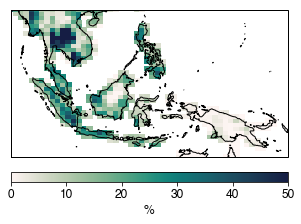

In [120]:
lat_lo = -13
lat_hi = 22
lon_lo = 90
lon_hi = 156

fontsize=12
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
fig = mp.figure(figsize=(4.25,2.75))
ax = fig.add_subplot(111, projection=map_proj)

levels = numpy.arange(0,51,5)
# contour_plot = ax.contourf(lon,lat,\
#                            pct_landunit_2a_timemean[1,:,:],\
#                            levels=levels,\
#                            cmap='BrBG',\
#                            extend='max')
contour_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                             pct_landunit_2a_timemean[1,:,:],\
                             cmap=cmocean.cm.tempo,\
                             vmin=0, vmax=50, transform=data_proj)
ax.coastlines(resolution='50m')
ax.set_extent([lon_lo,lon_hi,lat_lo,lat_hi], crs=map_proj)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.05,axpos.width,0.05])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('%',fontsize=fontsize)

landfrac

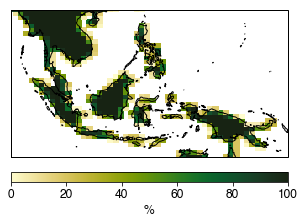

In [126]:
lat_lo = -13
lat_hi = 22
lon_lo = 90
lon_hi = 156

fontsize=12
map_proj = cartopy.crs.PlateCarree()
data_proj = cartopy.crs.PlateCarree()
fig = mp.figure(figsize=(4.25,2.75))
ax = fig.add_subplot(111, projection=map_proj)

contour_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                             landfrac*100.,\
                             cmap=cmocean.cm.speed,\
                             #cmocean.cm.turbid,\
                             vmin=0, vmax=100, transform=data_proj)
ax.coastlines(resolution='50m')
ax.set_extent([lon_lo,lon_hi,lat_lo,lat_hi], crs=map_proj)

fig.tight_layout()

axpos = ax.get_position()
cbar_ax = fig.add_axes([axpos.x0,axpos.y0-0.05,axpos.width,0.05])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='horizontal')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('%',fontsize=fontsize)

global crop fraction

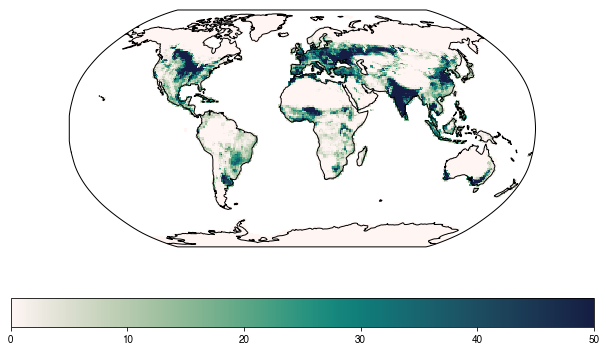

In [130]:
# lat_lo = -20
# lat_hi = 25
# lon_lo = 90
# lon_hi = 165

lat_lo=-30
lat_hi=30
lon_lo=-120
lon_hi=180

fontsize=12
map_proj = cartopy.crs.Robinson(central_longitude=0.)
data_proj = cartopy.crs.PlateCarree()
fig = mp.figure(figsize=(8.5,5))
ax = fig.add_subplot(111, projection=map_proj)

levels = numpy.arange(0,51,5)
contour_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                             pct_landunit_2a_timemean[1,:,:],\
                             cmap=cmocean.cm.tempo,\
                             vmin=0, vmax=50, transform=data_proj)
ax.coastlines(resolution='110m')

fig.tight_layout()
cbar = mp.colorbar(contour_plot, orientation='horizontal')

global maize, rice, wheat, soybean

# calculate percent of each crop in each crop land unit (for 1a)

In [142]:
pct_cft_1a_data = pct_cft_1a.values
pct_landunit_1a_data = pct_landunit_1a.values

In [156]:
pct_cftTIMESlandunit_1a = (numpy.expand_dims(pct_landunit_1a_data[:,1,:,:], axis=1)/100.)*(pct_cft_1a_data/100.)*100.

In [158]:
pct_cftTIMESlandunit_1a_timemean = numpy.nanmean(pct_cftTIMESlandunit_1a, axis=0)

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


* tmp = temperate

* trp = tropical

In [167]:
corn_tmp_idx = 2 # tmp = temperate
corn_tmp_irr_idx = 3
corn_trp_idx = 60
corn_trp_irr_idx = 61

springwheat_idx = 4
springwheat_irr_idx = 5

winterwheat_idx = 6
winterwheat_irr_idx = 7

soy_tmp_idx = 8
soy_tmp_irr_idx = 9
soy_trp_idx = 62
soy_trp_irr_idx = 63

oilpalm_idx = 38
oilpalm_irr_idx = 39

In [172]:
idx_list = [2,3,60,61,4,5,6,7,8,9,62,63,38,39]
name_list = ['corn tmp.','corn tmp. irr.', 'corn trp.','corn trp.irr',\
             'spring wheat','spring wheat irr.', 'winter wheat','winter wheat irr.',\
             'soy tmp.','soy tmp. irr.', 'soy trp.','soy trp. irr.',\
             'oil palm', 'oil palm irr.' ]

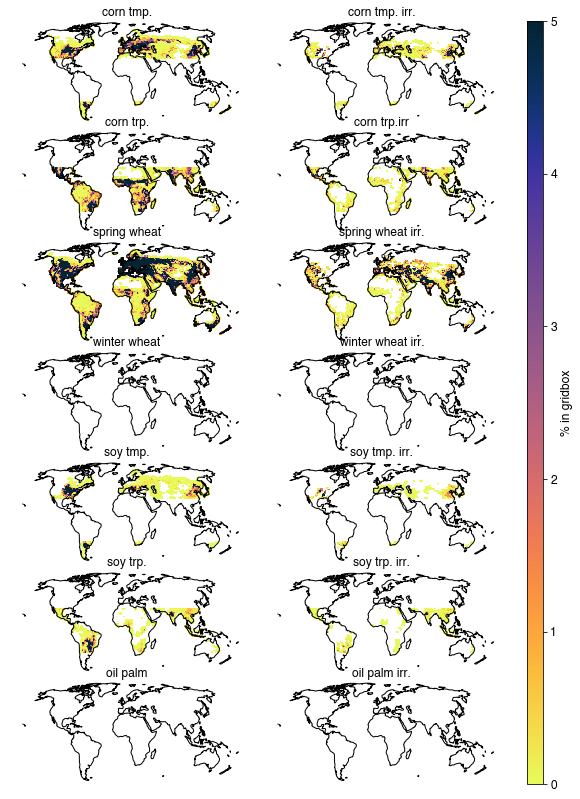

In [180]:
fontsize=12
map_proj = cartopy.crs.Robinson(central_longitude=5)
data_proj = cartopy.crs.PlateCarree()
fig = mp.figure(figsize=(7.5,11))

ax_list = []
for i in range(14):
    ax = fig.add_subplot(7,2,i+1,projection=map_proj)
    field = pct_cftTIMESlandunit_1a_timemean[idx_list[i],:,:]
    field[field==0]=numpy.nan
    contour_plot = ax.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,\
                                 field,\
                                 cmap=cmocean.cm.thermal_r, \
                                 vmin=0, vmax=5, transform=data_proj)
    
    ax.coastlines()
    if i==0:  x0,x1,y0,y1 = ax.get_extent()
    ax.set_extent([x0,x1,y0*.75,y1], crs=map_proj)
    ax.outline_patch.set_visible(False)
    
    ax.text(s=name_list[i], x=0.5,y=1.02, transform=ax.transAxes, ha='center',va='bottom',fontsize=fontsize)
    ax_list.append(ax)

fig.tight_layout(h_pad=0)

ax_tr = ax_list[1].get_position()
ax_br = ax_list[-1].get_position()
cbar_ax = fig.add_axes([ax_br.x1+0.025,ax_br.y0,0.03,ax_tr.y1-ax_br.y0])
cbar = mp.colorbar(contour_plot, cax=cbar_ax, orientation='vertical')
cbar_ax.tick_params(labelsize=fontsize)
cbar.set_label('% in gridbox', fontsize=fontsize)

fig.savefig('crops_f2000climo_compset.png', dpi=600, bbox_inches='tight', transparent=True)

**NOTE**

To plot a crop like oil palm, it technically uses the parameters for rainfed and irrigated rice (see [Table 2.35](https://escomp.github.io/ctsm-docs/doc/build/html/tech_note/Crop_Irrigation/CLM50_Tech_Note_Crop_Irrigation.html#table-crop-plant-functional-types) in the CLM5 documentation).

**SO** to get the oil palm data out, use:
1. The surface dataset located at ```/glade/p/cesmdata/inputdata/lnd/clm2/surfdata_map``` to get the 
2. 

/export/home/blangenb/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:916: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/export/home/blangenb/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:716: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


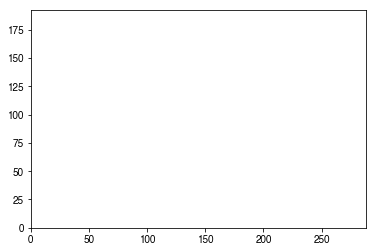

In [181]:
mp.pcolormesh(pct_cftTIMESlandunit_1a_timemean[oilpalm_idx,:,:])